## **I. Perkenalan**

Nama : 
- Heru Ramadhan
- Muhammad Vincar Rafi Theoseta
- Richie Devon Sumantri <br>

<div style='text-align: justify'><em>objective</em> dari dokumen ini adalah melakukan proses <em>clustering</em> menggunakan metode K-Means untuk menentukan jumlah kelompok pelanggan dari dataset <em>Churn for bank Customer</em>
</div><br>

---

## **II. Latar Belakang**

Berisi informasi mengenai latar belakang dan tujuan dari _project_ ini.

### **A. Latar Belakang**

Dalam industri perbankan yang semakin kompetitif, pemahaman mendalam terhadap perilaku pelanggan menjadi kunci keberhasilan. Salah satu cara efektif untuk memahami pelanggan adalah dengan melakukan segmentasi atau pengelompokan data pelanggan. Dengan mengelompokkan pelanggan berdasarkan karakteristik dan perilaku yang serupa, bank dapat mengembangkan strategi pemasaran yang lebih efektif dan personal.

### **B. Tujuan**

- Mengidentifikasi segmen-segmen pelanggan yang berbeda berdasarkan karakteristik dan perilaku mereka.
- Mengembangkan profil untuk setiap segmen pelanggan.
- Memberikan rekomendasi program pemasaran yang sesuai untuk masing-masing segmen.

## **III. Import Libraries**

Tahap memuat modul yang akan digunakan.

In [1]:
# Library untuk data manipulasi
import pandas as pd
import numpy as np

# Library export dan import model, scaling dan encoding
import pickle
import json

# Library pengolahan statistik
from scipy import stats
from scipy.stats import kruskal

# Library pengolahan outlier
from feature_engine.outliers import Winsorizer

# Library pengolahan menggunakan machine learning
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score , precision_score, recall_score, f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer

# Library Visualisasi
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import seaborn as sns
from IPython.display import display, HTML
from PIL import Image

# Library personal function
from function import *

c:\Users\ricdv\Downloads\function.py:45: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("[^A-Za-z\s']", " ", text)


## **IV. Data Loading**

Tahap memuat data dan pergantian nama kolom.

In [2]:
# Membuka data dari dokumen csv dan diassign menuju variabel dataframe
df_org = pd.read_csv('FP_002_Bank_clean.csv')

# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Penampilan Dataframe Original</h3></b></center>'))

# Menampilkan data
display(df_org)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# Menampilkan judul display
display(HTML('<center><b><h3>Data Kolom Dataframe</h3></b></center>'))

# Menampilkan semua kolom pada dataframe
df_org.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [4]:
# Menampilkan informasi umum mengenai dataframe
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Insight:**

- Data Terdiri dari 10.000 Baris dan 14 Kolom.
- Kolom pada _dataframe_ mayoritas terdiri dari data dengan tipe integer dan object
- Berdasarkan informasi di atas terlihat bahwa tidak ada _missing value_ pada semua kolom di _dataframe_.

## **V. Exploratory Data Analysis (EDA)**

<div style='text-align: justify'>Tahap eksplorasi data menggunakan grouping, visualisasi sederhana dan lain-lain.
</div>

In [5]:
df_eda = df_org.copy()

### **1. Churn Rate**

Visualisasi untuk melihat proporsi *Churn Rate* dari perusahaan

Churn Rate: 20.369999999999997%


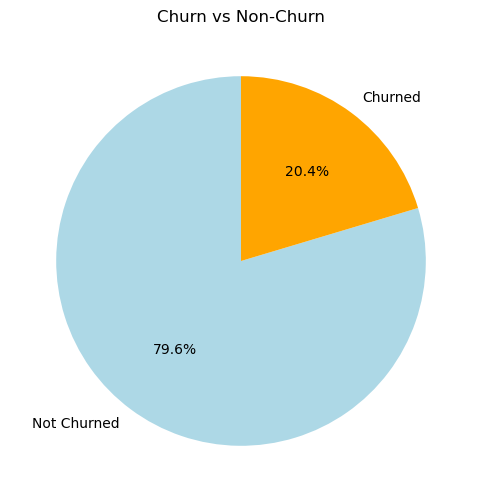

In [6]:
# Get the count of churned (Exited = 1) and non-churned (Exited = 0)
churn_counts = df_eda['exited'].value_counts()
# Get the churn rate
churn_rate = churn_counts[1] / churn_counts.sum() * 100
print(f"Churn Rate: {churn_rate}%")
# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Churn vs Non-Churn')
plt.show()

**Insight**:

- Sekitar 79,6% pelanggan tidak *churn* atau meninggalkan perusahaan (diwakili oleh warna biru). Ini menunjukkan bahwa mayoritas pelanggan tetap bersama perusahaan, mengindikasikan tingkat retensi yang relatif tinggi.
- Hanya 20,4% pelanggan yang *churn* atau meninggalkan perusahaan (diwakili oleh warna oranye). Meskipun ini adalah proporsi yang lebih kecil, *churn* masih mewakili bagian yang signifikan, dan mungkin perlu diselidiki alasan *churn* dan bekerja untuk meningkatkan retensi pelanggan.

### **2. Distribusi Usia**

Visualisasi histogram untuk melihat persebaran usia dalam data pelanggan

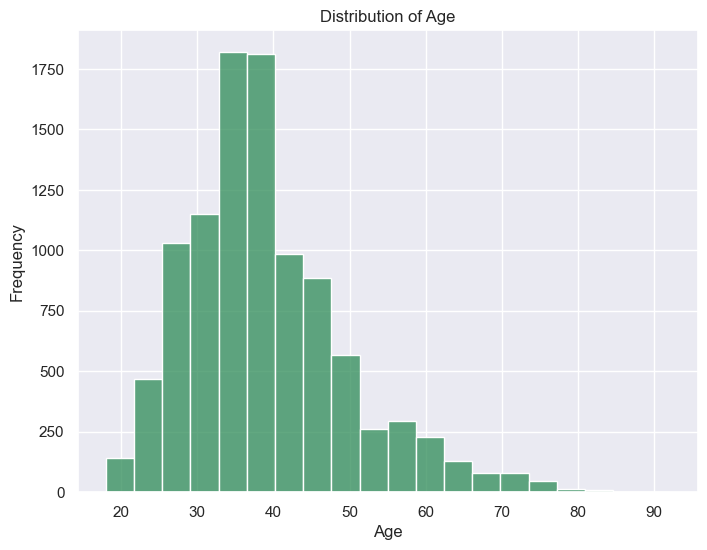

In [7]:
# Set the style
sns.set(style="darkgrid")

# Create a histogram for the Age column
plt.figure(figsize=(8, 6))
sns.histplot(df_eda['age'], bins=20, kde=False, color='seagreen')

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Insight:**

- **Distribusi miring kanan:** Ini menunjukkan bahwa sebagian besar individu terkonsentrasi pada kelompok usia yang lebih muda, terutama antara 30 dan 40 tahun. Hal ini menunjukkan bahwa dataset memiliki populasi yang relatif muda.
  
- **Kelompok Usia Tertinggi**: Kelompok usia yang paling sering adalah sekitar 30 hingga 40 tahun, dengan frekuensi puncak sekitar 1750 individu. Kelompok usia ini kemungkinan paling banyak diwakili dalam dataset.
  
- **Penurunan Bertahap pada Kelompok Usia Lansia:** Terdapat penurunan frekuensi secara bertahap seiring bertambahnya usia di atas 40 tahun, dengan sangat sedikit individu yang berusia di atas 60 tahun. Hal ini dapat menunjukkan tren demografis alami atau mungkin bias pengumpulan data.
  
- **Representasi Terbatas Kelompok Usia Lansia:** Keberadaan sangat sedikit individu dalam rentang usia di atas 70 tahun dapat menunjukkan jumlah individu lansia yang kecil dalam populasi atau mungkin kurangnya fokus pada demografi ini dalam dataset.

Data menunjukkan bahwa mayoritas orang dalam data ini berusia antara 30 dan 40 tahun. Namun, jumlah orang yang lebih tua semakin sedikit, dengan hanya sedikit orang yang berusia di atas 60 tahun. Hal ini mungkin karena populasi sebenarnya memiliki lebih banyak orang muda atau bisa juga karena data dikumpulkan lebih banyak dari kelompok usia muda.

### **3. Distribusi Geografi**

Visualisasi untuk melihat perbandingan jumlah pelanggan di tiap negara

C:\Users\ricdv\AppData\Local\Temp\ipykernel_4456\873135763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='geography', data=df_eda, palette='ocean')


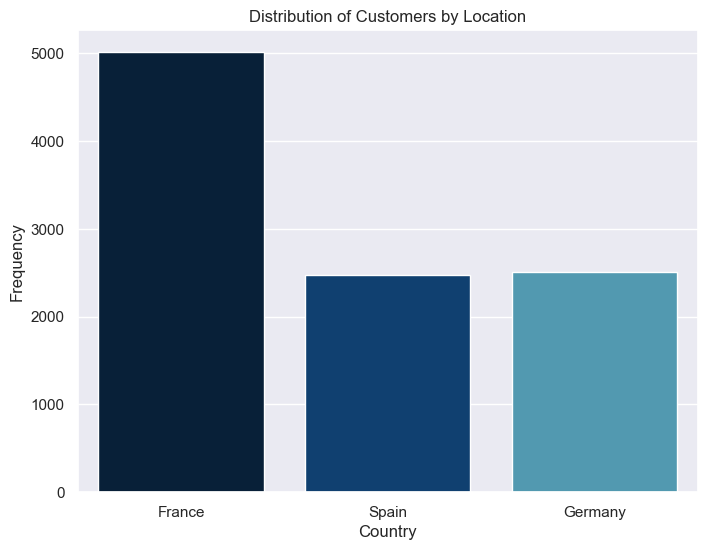

In [8]:
# Set the style
sns.set(style="darkgrid")

# Create a categorical plot for the 'geography' column
plt.figure(figsize=(8, 6))
sns.countplot(x='geography', data=df_eda, palette='ocean')

# Add labels and title
plt.title('Distribution of Customers by Location')
plt.xlabel('Country')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Insight:**

- **Mayoritas pelanggan berasal dari Prancis:** Jumlah pelanggan dari Prancis jauh lebih banyak dibandingkan dengan negara-negara lain.
  
- **Keseimbangan Spanyol dan Jerman:** Kedua negara ini memiliki jumlah pelanggan yang jauh lebih sedikit daripada Prancis.

- **Konsentrasi Lokasi:** Distribusi pelanggan sangat terkonsentrasi di Prancis, sebagian besar pelanggan berasal dari Prancis.

Data menunjukkan bahwa sebagian besar pelanggan berasal dari Prancis, jauh lebih banyak daripada dari Spanyol dan Jerman. Ini menunjukkan bahwa pasar utama untuk produk atau layanan ini berada di Prancis, dengan Spanyol dan Jerman memiliki pangsa pasar yang lebih kecil.

### **4. Distribusi Pelanggan berdasarkan Tenure**

Visualisasi untuk melihat distribusi jumlah pelanggan berdasarkan berapa lama mereka menjadi pelanggan

C:\Users\ricdv\AppData\Local\Temp\ipykernel_4456\3571092248.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tenure_group', data=df_eda, palette='viridis')


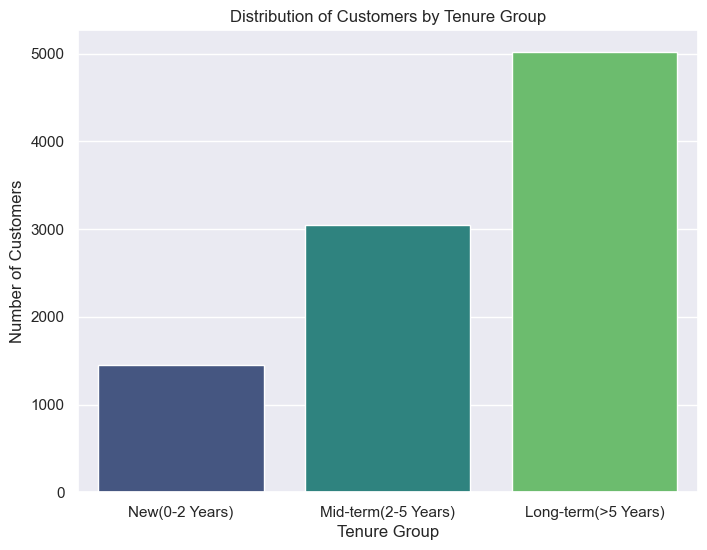

In [9]:
# Create tenure groups: new, mid-term, long-term
bins = [0, 2, 5, df_eda['tenure'].max()]  # Adjust bins as needed
labels = ['New(0-2 Years)', 'Mid-term(2-5 Years)', 'Long-term(>5 Years)']
df_eda['tenure_group'] = pd.cut(df_eda['tenure'], bins=bins, labels=labels, right=False)

# Plot the distribution of tenure groups
plt.figure(figsize=(8, 6))
sns.countplot(x='tenure_group', data=df_eda, palette='viridis')

# Add labels and title
plt.title('Distribution of Customers by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')

# Show plot
plt.show()

**Insight:**

- **Dominasi Jangka Panjang** : Mayoritas pelanggan telah bersama perusahaan lebih dari 5 tahun, Hal ini menunjukkan retensi pelanggan yang kuat.

- **Kehadiran Jangka Menengah** : Sejumlah besar pelanggan termasuk dalam kelompok masa jabatan 2-5 tahun, Ini menunjukkan basis pelanggan jangka menengah yang stabil.

- **Beberapa Customer Baru**: Kelompok terkecil terdiri dari pelanggan dengan masa jabatan 0-2 tahun, Ini menunjukkan tingkat akuisisi yang lebih lambat atau hubungan pelanggan yang lebih mapan.

Data menunjukkan bahwa banyak pelanggan telah menjadi pelanggan setia perusahaan selama bertahun-tahun, dengan sebagian besar pelanggan telah bersama perusahaan lebih dari 5 tahun. Meskipun ada sejumlah pelanggan baru, jumlah mereka lebih sedikit dibandingkan dengan pelanggan yang telah lama menjadi pelanggan. Hal ini menunjukkan bahwa perusahaan berhasil mempertahankan pelanggan dan membangun hubungan jangka panjang dengan mereka.

### **5. Churn Berdasarkan Skor Kredit**

Visualisasi untuk membandingkan churn berdasarkan skor kredit pelanggan

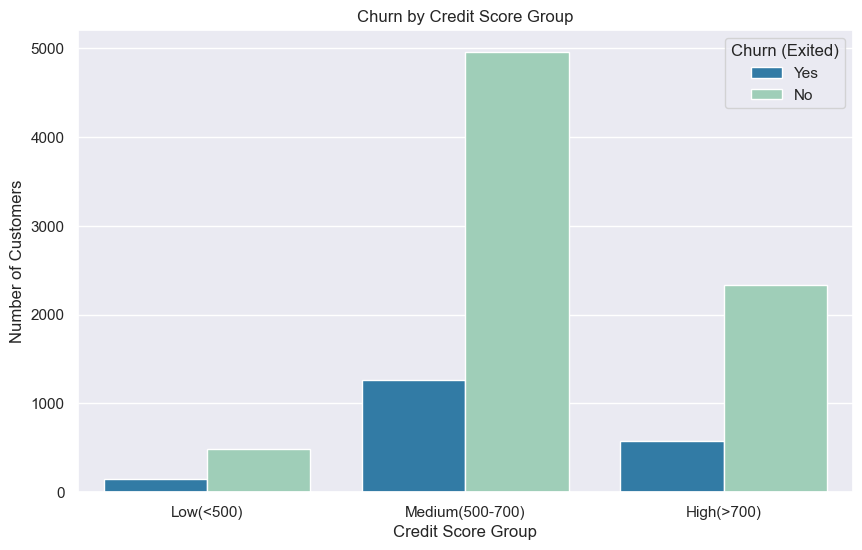

In [10]:
# Define the bins for Credit Score ranges
bins = [0, 500, 700, df_eda['credit_score'].max()]
labels = ['Low(<500)', 'Medium(500-700)', 'High(>700)']

# Create a new column for Credit Score Group
df_eda['credit_score_group'] = pd.cut(df_eda['credit_score'], bins=bins, labels=labels, right=False)
# Create new column for hue
df_eda['exited_hue'] = df_eda['exited'].astype(str)
# Plot the churn rate by Credit Score Group
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_score_group', hue='exited_hue', data=df_eda, palette='YlGnBu_r')

# Add labels and title
plt.title('Churn by Credit Score Group')
plt.xlabel('Credit Score Group')
plt.ylabel('Number of Customers')
plt.legend(title='Churn (Exited)', labels=['Yes', 'No'])

# Show the plot
plt.show()

**Insight:**

- **Mayoritas pelanggan memiliki skor kredit sedang (500-700):** Kelompok ini juga memiliki tingkat churn tertinggi di antara semua kelompok.

- **Pelanggan dengan skor kredit rendah (<500) memiliki populasi terkecil:** Namun, sebagian kecil dari mereka telah meninggalkan perusahaan.

- **Pelanggan dengan skor kredit tinggi (>700) menunjukkan tingkat churn yang lebih rendah:** Hal ini menunjukkan perilaku yang lebih stabil atau loyal dibandingkan dengan kelompok lainnya.

Data menunjukkan bahwa sebagian besar pelanggan memiliki skor kredit sedang, tetapi kelompok ini juga memiliki tingkat pelanggan yang berhenti berlangganan paling tinggi. Pelanggan dengan skor kredit rendah lebih sedikit, tetapi masih ada beberapa yang berhenti berlangganan. Sebaliknya, pelanggan dengan skor kredit tinggi cenderung lebih stabil dan jarang berhenti berlangganan. Hal ini menunjukkan bahwa skor kredit dapat menjadi indikator potensi churn pelanggan.

### **6. Churn berdasarkan Saldo**

Visualisasi untuk membandingkan churn berdasarkan saldo pelanggan

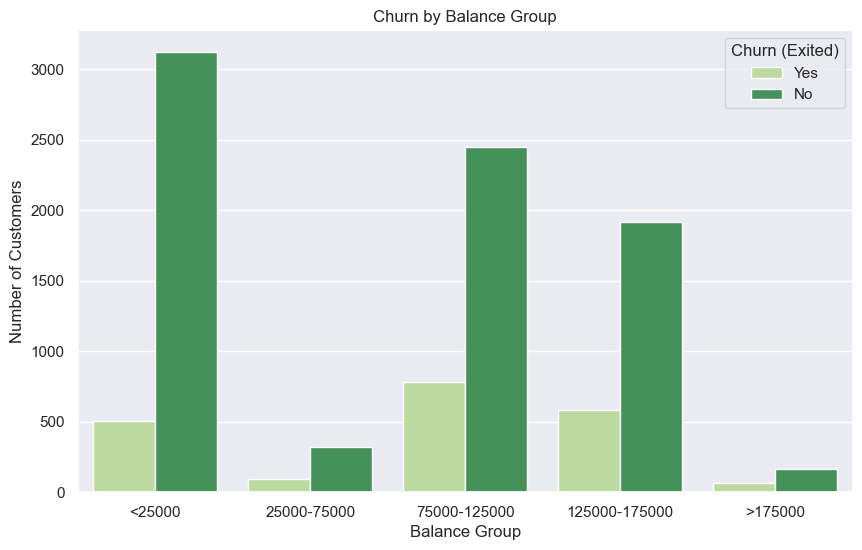

In [11]:
# Define the bins for Credit Score ranges
bins = [0, 25000, 75000, 125000, 175000, df_eda['balance'].max()]
labels = ['<25000', '25000-75000', '75000-125000', '125000-175000', '>175000']

# Create a new column for Credit Score Group
df_eda['balance_group'] = pd.cut(df_eda['balance'], bins=bins, labels=labels, right=False)

# Plot the churn rate by Credit Score Group
plt.figure(figsize=(10, 6))
sns.countplot(x='balance_group', hue='exited_hue', data=df_eda, palette='YlGn')

# Add labels and title
plt.title('Churn by Balance Group')
plt.xlabel('Balance Group')
plt.ylabel('Number of Customers')
plt.legend(title='Churn (Exited)', labels=['Yes', 'No'])

# Show the plot
plt.show()


**Insight:**

- **Saldo Rendah, Churn Rendah:** Pelanggan dengan saldo di bawah €25.000 memiliki populasi tertinggi dan tingkat *churn* terendah, Hal ini menunjukkan retensi yang kuat dalam kelompok ini.

- **Churn Lebih tinggi di Salo Menengah:** *Churn* lebih sering terjadi pada pelanggan dengan saldo antara €75.000 dan €175.000, Ini menunjukkan bahwa kelompok ini berisiko lebih tinggi.

- **Saldo Sangat Tinggi, Churn Rendah:** Pelanggan dengan saldo di atas €175.000 memiliki tingkat *churn* terendah, Ini menunjukkan bahwa mereka adalah kelompok yang paling stabil atau loyal.

Data menunjukkan bahwa pelanggan dengan saldo rendah cenderung memiliki tingkat *churn* yang lebih rendah, sementara pelanggan dengan saldo menengah lebih sering berhenti berlangganan. Pelanggan dengan saldo sangat tinggi memiliki tingkat *churn* yang sangat rendah, menunjukkan bahwa mereka adalah kelompok pelanggan yang paling stabil dan loyal. Hal ini mungkin menunjukkan bahwa pelanggan dengan saldo rendah memiliki ketergantungan yang lebih tinggi pada produk atau layanan perusahaan, sementara pelanggan dengan saldo tinggi mungkin memiliki lebih banyak pilihan dan lebih mudah beralih ke pesaing

### **7. Rata-rata Gaji Churn dan Non-churn**

Visualisasi untuk melihat perbandingan rata-rata gaji pada pelanggan yang menetap pada perusahaan   dengan yang meninggalkan perusahaan

C:\Users\ricdv\AppData\Local\Temp\ipykernel_4456\973587931.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='exited', y='estimated_salary', data=df_eda, estimator='mean', ci=None, palette='mako_r')
C:\Users\ricdv\AppData\Local\Temp\ipykernel_4456\973587931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='exited', y='estimated_salary', data=df_eda, estimator='mean', ci=None, palette='mako_r')


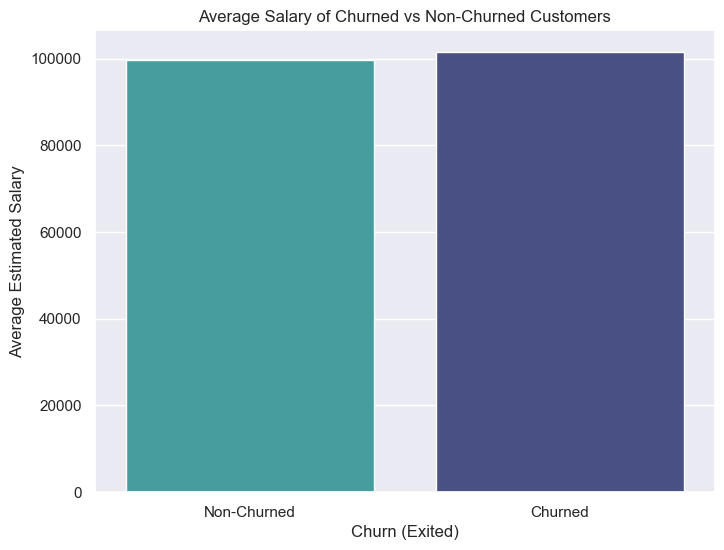

In [12]:
# Create a bar plot to compare the average salary of churned vs non-churned customers
plt.figure(figsize=(8, 6))
sns.barplot(x='exited', y='estimated_salary', data=df_eda, estimator='mean', ci=None, palette='mako_r')

# Add labels and title
plt.title('Average Salary of Churned vs Non-Churned Customers')
plt.xlabel('Churn (Exited)')
plt.ylabel('Average Estimated Salary')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])  # Customize the x-axis labels

# Show the plot
plt.show()

**Insiht:**

- **Gaji yang Serupa:** Gaji rata-rata yang diperkirakan hampir sama untuk pelanggan yang *churn* dan yang tidak *churn*, Hal ini menunjukkan bahwa gaji mungkin bukan faktor yang signifikan dalam *churn* pelanggan.

- **Tidak Ada Dampak Gaji pada Churn:** Karena ada sedikit perbedaan dalam gaji rata-rata antara kedua kelompok, Faktor-faktor lain mungkin lebih berpengaruh dalam menentukan *churn*.

Data menunjukkan bahwa gaji rata-rata pelanggan yang berhenti berlangganan dan yang tetap berlangganan hampir sama. Hal ini menunjukkan bahwa gaji mungkin bukan faktor utama yang menyebabkan pelanggan berhenti berlangganan. Faktor-faktor lain, seperti kualitas layanan, kepuasan pelanggan, atau harga, mungkin lebih berpengaruh dalam menentukan *churn*.

## **VI. Feature Engineering**

<div style='text-align: justify'>Tahap pengolahan data sebelum melakukan proses permodelan.
</div>

In [13]:
# Proses persalinan dataframe dari dataframe original
df_feat = df_org.copy()

### **1. Handling Data Duplikasi**

Pada tahap ini dilakukan pengecekan duplikasi data pada _dataframe_.

In [14]:
# Pengecekan data duplikasi
print(f'Jumlah data duplikat: {df_feat.duplicated().sum()}')

Jumlah data duplikat: 0


**Insight**:

- Berdasarkan informasi pengecekan data duplikasi, tidak terdapat duplikasi data sehingga tidak perlu dilakukan proses _treatment_.

### **2. Preprocessing Data**

Pada tahap ini dilakukan pemisahan data antara data statis atau tidak

In [15]:
# Pembuatan variabel berdasarkan jenis kolom
Kolom_statis = ['row_number', 'customer_id', 'surname']
kolom_numerikal = ['credit_score', 'age', 'balance', 'estimated_salary']
kolom_kategorikal = ['geography', 'gender', 'tenure', 'has_cr_card', 'is_active_member', 'exited']
kolom_kategorikal_ordinal = ['tenure', 'num_of_products']
kolom_kategorikal_nominal = ['geography', 'gender', 'has_cr_card', 'is_active_member', 'exited']

# Pembuatan dataframe
df_feat = df_feat.drop(Kolom_statis, axis=1)

# Proses Pemisahan kolom berdasarkan tipe numerikal dan kategorikal
Data_num = df_feat[kolom_numerikal]
Data_cat = df_feat[kolom_kategorikal]

**Penjelasan**:

- **Data_num**: Merupakan variabel _dataframe_ yang berisi kolom bertipe numerikal.
- **Data_cat**: Merupakan variabel _dataframe_ yang berisi kolom bertipe kategorikal.

### **3. Handling Outlier**

Pada tahap ini dilakukan penanganan terhadap data yang memiliki _outlier_.

In [16]:
# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Data Persentase Outlier Sebelum Outlier Handling</h3></b></center>'))

# Pengecekan persentase outlier
Data_num_outlier = analisis_outlier(Data_num)

# Menampilkan hasil dataframe
Data_num_outlier

,Nama_kolom,Persentase_outlier,Jumlah_outlier,Jenis_distribusi,Skew
0,age,0.12,12,Extreme Skew,1.01132
1,credit_score,0.08,8,Normal,-0.071607
2,balance,0.0,0,Normal,-0.141109
3,estimated_salary,0.0,0,Normal,0.002085


**Insight**:

- Terlihat dari informasi ini bahwa keseluruhan data memiliki _outlier_ dan kurang dari 5% keseluruhan data.
- Informasi dari _dataframe outlier_ terlihat bahwa 1 kolom memiliki distribusi _skew_, 3 kolom memilki distribusi normal dan 1 kolom memiliki distribusi _extreme skew_

**Treatment**:

- Bentuk _treatment_ yang akan dilakukan adalah melakukan proses capping pada data-data kolom di atas sehingga dapat meminimalisir _outlier_ tanpa membuang data tersebut.

**Proses Drop Outlier**

In [17]:
# Treatment Handling menggunakan capping
df_feat[kolom_numerikal] = auto_outlier_handling('Capping', df_feat[kolom_numerikal], df_feat[kolom_numerikal], Data_num_outlier)

# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Data Persentase Outlier Setelah Outlier Handling</h3></b></center>'))

# Menampilkan dataframe analisis persentase outlier
Data_num_outlier = analisis_outlier(df_feat[kolom_numerikal])
Data_num_outlier

,Nama_kolom,Persentase_outlier,Jumlah_outlier,Jenis_distribusi,Skew
0,age,3.59,359,Skew,0.990797
1,credit_score,0.08,8,Normal,-0.06993
2,balance,0.0,0,Normal,-0.141109
3,estimated_salary,0.0,0,Normal,0.002085


**Penjelasan**:

- Terlihat bahwa keseluruhan data telah mengalami proses Capping namun masih terlihat adanya _outlier_ pada data kolom Umur dan CreditScore, hal ini dapat diakibatkan oleh perubahan jenis distribusi yang awalnya adalah _extreme skew_ menjadi _skew_ sehingga mempersempit area _boundaries_

**Treatment**:
- Tidak akan dilakukan _treatment_ berkelanjutan, hal ini dikarenakan _outlier_ dianggap sebagai data _genuine_ karena adanya perubahan jenis distribusi.

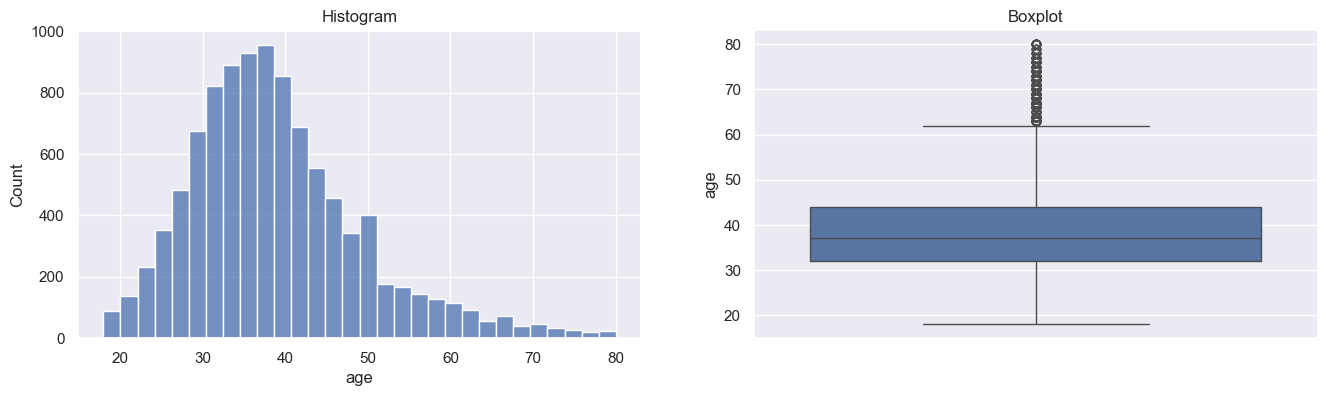

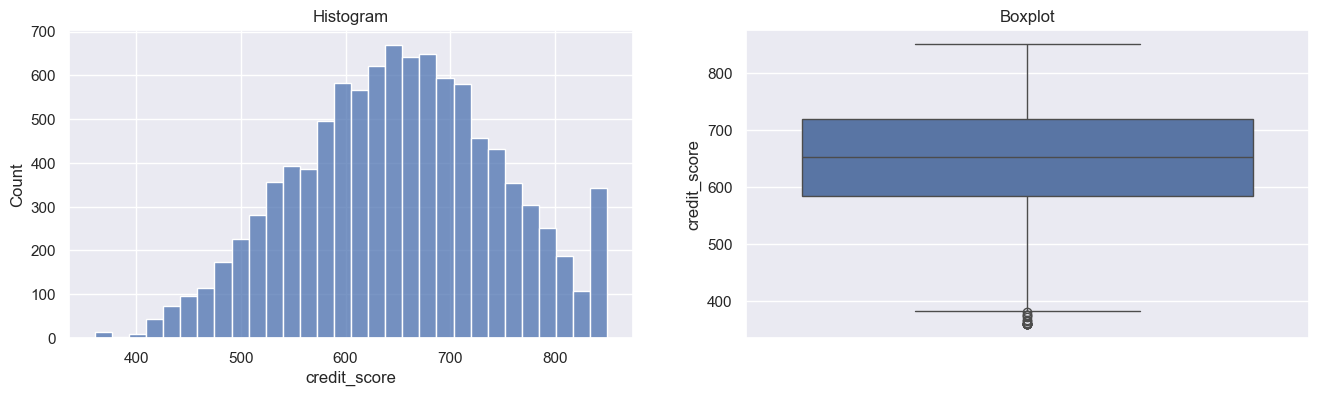

In [18]:
# Proses pembuatan plot pada data yang masih memiliki outlier
for col in Data_num_outlier[Data_num_outlier['Persentase_outlier'] > 0]['Nama_kolom']:
	diagnostic_plots(df_feat[kolom_numerikal], col)

### **4. Handling Missing Value**

Pada tahap ini dilakukan penanganan terhadap adanya nilai yang kosong pada _dataframe_.

In [19]:
# Pengecekan missing value
df_feat.isna().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

**Penjelasan**:

- Terlihat bahwa tidak adanya data _missing value_ pada setiap kolom pada dataframe ini.  

**Treatment**:
- Tidak dilakukan _treatment_ apapun.

### **5. Preprocessing Pipeline**

Berisi _scaling, _encoding_, _pca_ dan lain-lain. _Scaling_ dapat dilakukan menggunakan _Robust scaler_ dan _Standard scaler_, pemilihan _scaler_ ini bergantung pada tipe data terdistribusi normal atau tidak. Dengan menggunakan _Robust scaler_ yang mempertimbangkan median dan iqr sehingga cocok dengan data bertipe _skew_, sementara penggunaan _standard scaler_ mempertimbangkan rata-rata dan standard deviasi dari data tersebut sehingga cocok untuk distribusi normal. Proses _encoding_ dilakukan pada kolom kategorikal nominal dan ordinal. Proses _encoding_ pada data kolom nominal akan menggunakan _treatment_ **One-Hot Encoding**, sementara kolom ordinal akan menggunakan _treatment_ **Ordinal Encoding**.


In [20]:
# Fit PCA penentu jumlah komponen
pca = PCA()
pca.fit(df_feat[kolom_numerikal])

# Penentuan Jumlah komponen
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_comp = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Settings - Penentuan scaller, encoding dan pca
scaller = StandardScaler()
pca_pipeline = PCA(n_components=n_comp)
ohe = OneHotEncoder()
ore = OrdinalEncoder(
    categories = [
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], # Value kolom ordinal pertama secara berurutan
        [1, 2, 3, 4] # Value kolom ordinal kedua secara berurutan
    ]
)

# Pembuatan pipeline numerikal
num_pipeline = make_pipeline(
    scaller,
    pca_pipeline
)

# Pembuatan pipeline kategorikal nominal dan ordinal
cat_nominal = make_pipeline(ohe)
cat_ordinal = make_pipeline(ore)

# Pembuatan Column transformer
preprocessor = ColumnTransformer (
     transformers = [
         ('numerikal', num_pipeline, kolom_numerikal),
         ('kategorikal ordinal', cat_ordinal, kolom_kategorikal_ordinal),
         ('kategorikal nominal', cat_nominal, kolom_kategorikal_nominal)
     ]
 )

# Pembuatan pipeline akhir
final_pipeline = make_pipeline(preprocessor)

# Pengubahan kolom
df_final = final_pipeline.fit_transform(df_feat)


## **VII. Model Definition**

Model yang akan digunakan dalam dokumen ini adalah sebagai berikut.

**K-Means**, merupakan teknik pengelompokkan data _unsupervised_ menggunakan nilai rata-rata yang stabil pada suatu Centroid. Kelebihan dari model ini adalah waktu komputasi yang singkat dan menjamin bahwa dapat mendapatkan jumlah kelompok yang tepat, sementara kekurangan dari model ini adalah sensitif terhadap _outlier_ dan hanya bisa digunakan untuk data numerikal.

Inertia dalam klustering menaggunakan **K-Means** digunakan untuk mengukur jarak antar data dan pusat Centroid, model **K-Means** yang baik memiliki nilai Intertia yang rendah dan jumlah kelompok yang kecil, sebagai penentu jumlah kelompok.

Elbow method merupakan metode untuk menentukan jumlah kelompok berdasarkan jumlah inertia pada jumlah kelompok tersebut. Penggunaan dari elbow method adalah untuk mencari kelompok yang paling optimal dengan cara melihat perubahan inertia yang paling signifikan ketika melakukan perhitungan antar jumlah kelompok yang ditentukan. Kelebihan dari elbow method adalah membantu lebih mudah untuk memahami penentuan jumlah kelompok data yang paling efektif dan efisien, sementara kekurangan dari elbow method adalah memerlukan skala pengukuran lain seperti shilouete score untuk mementukan inertia skor yang berdekatan agar dapat menghasilkan data yang lebih tepat dan penentuan jumlah kelompok.

Text(0, 0.5, 'Silhouette Score')

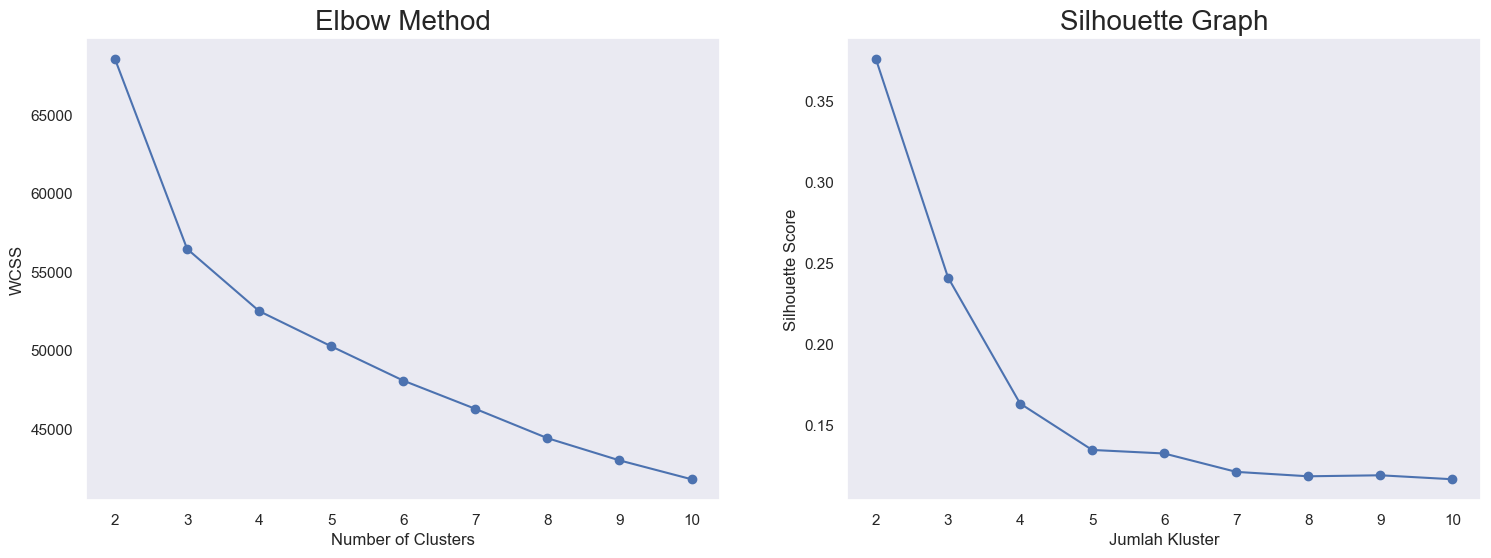

In [21]:
# Pembuatan list untuk pengisian data
wcss = []
sc = []

# Kalkulasi metode K-Means untuk kluster 2 sampai 10
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_final)
    wcss.append(km.inertia_)
    sc.append(silhouette_score(df_final, km.labels_))

# Pembuatan subplot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 6)

# Pembuatan grafik elbow method
ax1.plot(range(2, max_cluster+1), wcss, marker ="o")
ax1.grid()
ax1.set_title('Elbow Method', fontsize = 20)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS')

# Pembuatan grafik Silhouette graph
ax2.plot(range(2, max_cluster+1), sc, marker ="o")
ax2.grid()
ax2.set_title('Silhouette Graph', fontsize = 20)
ax2.set_xlabel('Jumlah Kluster')
ax2.set_ylabel('Silhouette Score')

**Insight**:

Terlihat bahwa berdasarkan penurunan yang cukup signifikan pada inertia skor antara jumlah kluster 4 dan 5. Sebagai penentuan dari jumlah kluster yang akan dipilih dapat menggunakan silhouette skor yang paling tinggi di anatara ketiga kluster tersebut. Terlihat bahwa 4 kluster memiliki nilai silhouette skor yang paling tinggi. Namun membutuhkan visualisasi untuk penentuan akhir jumlah kluster.

For n_clusters = 4 The average silhouette_score is : 0.1636564667502829
For n_clusters = 5 The average silhouette_score is : 0.14588584182386816


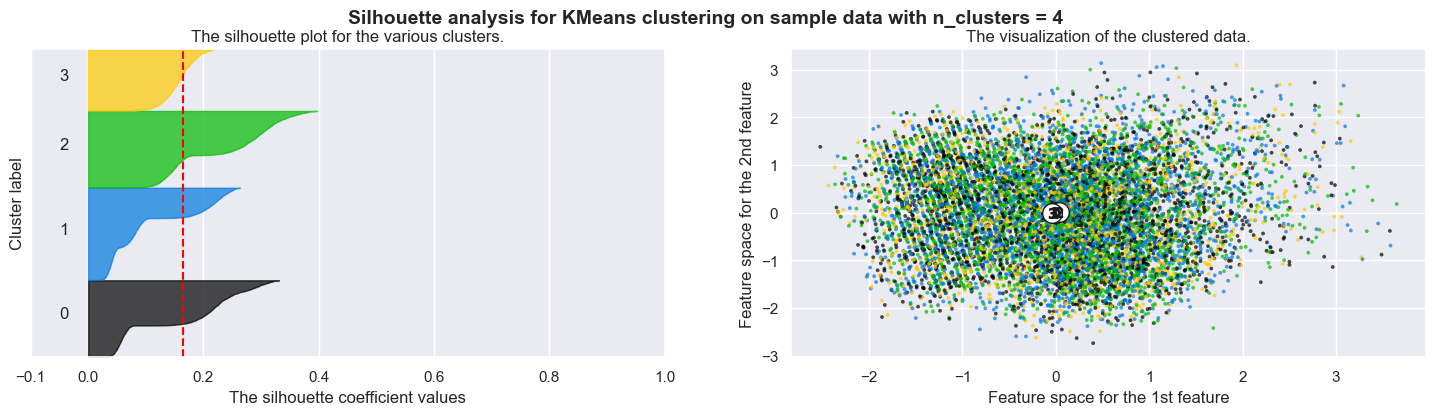

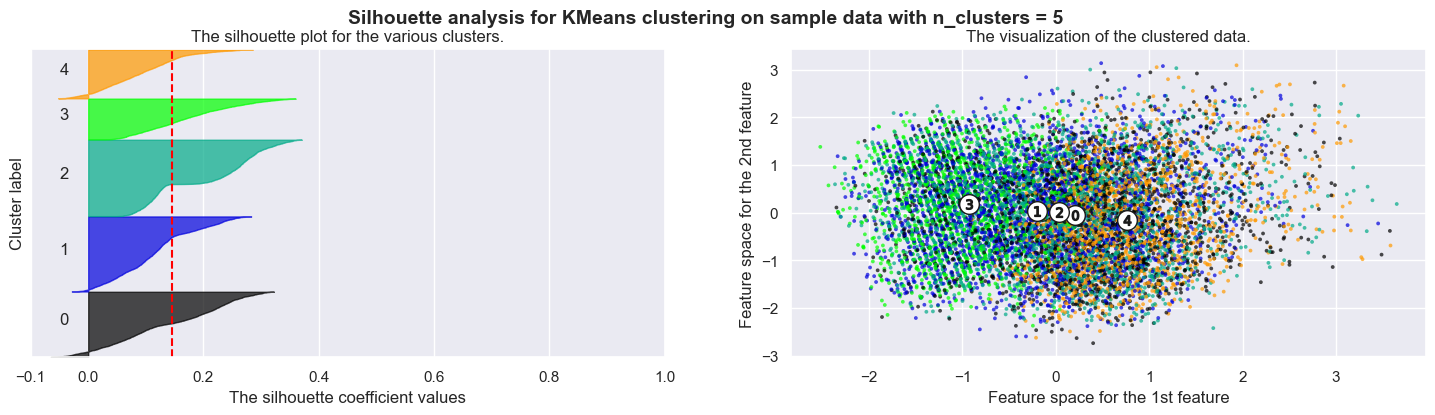

In [22]:
# Visualisasi Cluster Data
plot_silhouette([4], df_final, 8)
plot_silhouette([5], df_final, 8)

**Insight**:
- Terlihat bahwa model dengan kluster berjumlah 5 dapat lebih bisa membedakan antar masing-masing kluster dibandingkan dengan jumlah model dengan kluster berjumlah 4 yang memiliki posisi centroid kluster yang berada pada posisi tengah data. Sehingga jumlah kluster yang dipilih adalah 5 Kluster

## **VIII. Model Training**

Pada Tahap ini dilakukan proses _training_ pada model yang telah ditentukan.

In [23]:
# Penentuan jumlah kluster
cluster = 5

# Pembuatan model dan proses pembelajaran data
km = KMeans(n_clusters = cluster,
            init = 'k-means++',
            max_iter = 300,
            n_init = 10,
            random_state = random_state)
final_model = km.fit(df_final)
pred = km.predict(df_final)

# Input data prediksi kluster ke dalam dataframe original
df_eval = df_org.copy()
df_eval['kluster'] = pred

# Menampilkan dataframe dengan prediksi
display(HTML('<center><b><h3>Data Hasil Prediksi</h3></b></center>'))
display(df_eval)


,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,kluster
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,2
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,4
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,4
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


## **IX. Secondary Data Analysis**

Tahap analisis data hasil prediksi _clustering_ berdasarkan pembelajaran permodelan.

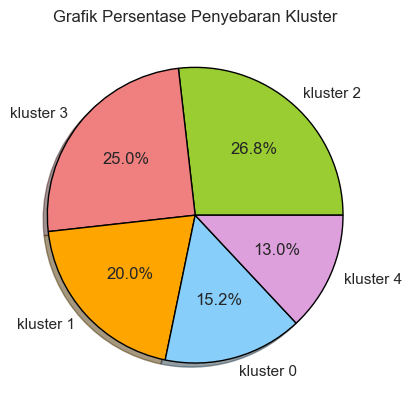

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,kluster
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,2.00600
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,1.25679
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.00000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,1.00000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,2.00000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,3.00000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,4.00000


In [24]:
# Menampilkan
kluster_counts = df_eval['kluster'].value_counts()
plt.pie(kluster_counts,
        autopct='%1.1f%%',
        labels=['kluster 2',
                'kluster 3',
                'kluster 1',
                'kluster 0',
                'kluster 4'],
        colors=['yellowgreen',
                'lightcoral',
                'orange',
                'lightskyblue',
                'plum'],
        wedgeprops = {'edgecolor':'black'},
        shadow=True
        )
plt.title('Grafik Persentase Penyebaran Kluster')
plt.show()

display(HTML('<center><b><h3>Data Statistik Data Hasil Prediksi</h3></b></center>'))
display(df_eval.describe())

**Insight**:

Terlihat bahwa dari persebaran kluster, kluster 2 memiliki jumlah paling banyak sebesar 26.8 persen dari keseluruhan data sementara kluster 4 memiliki jumlah sebesar 13 persen dari keseluruhan data.

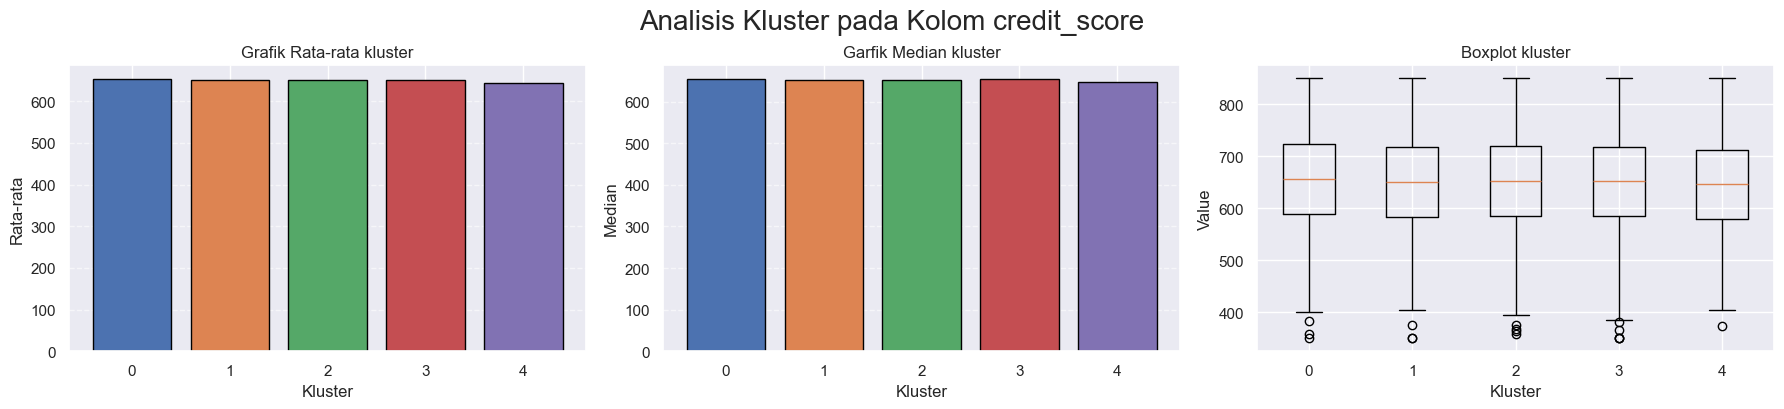

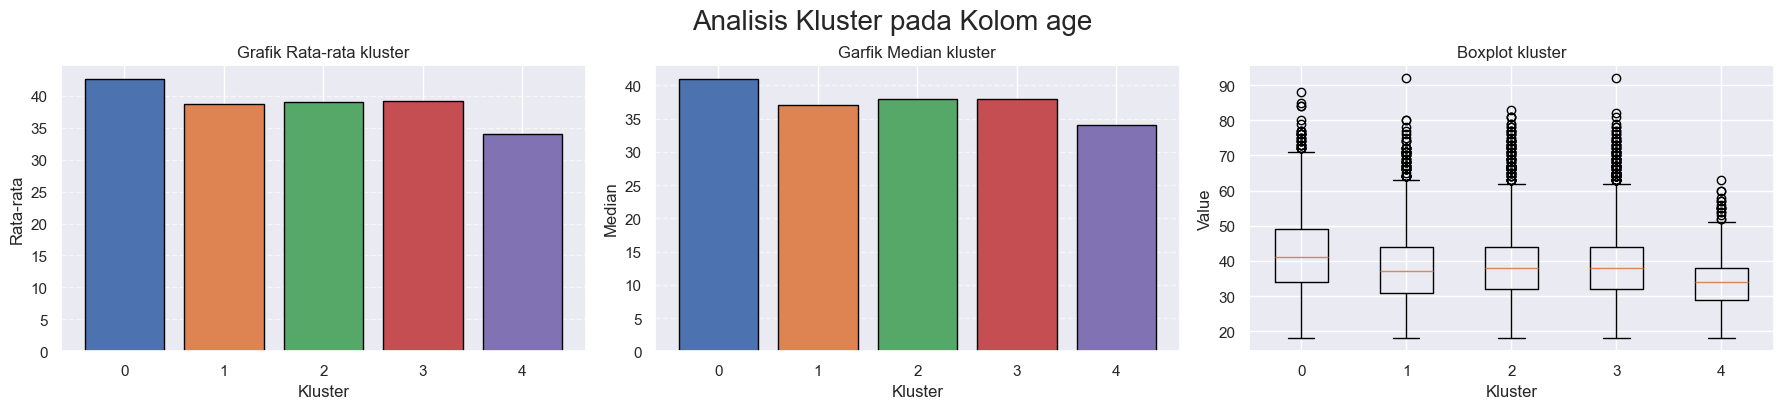

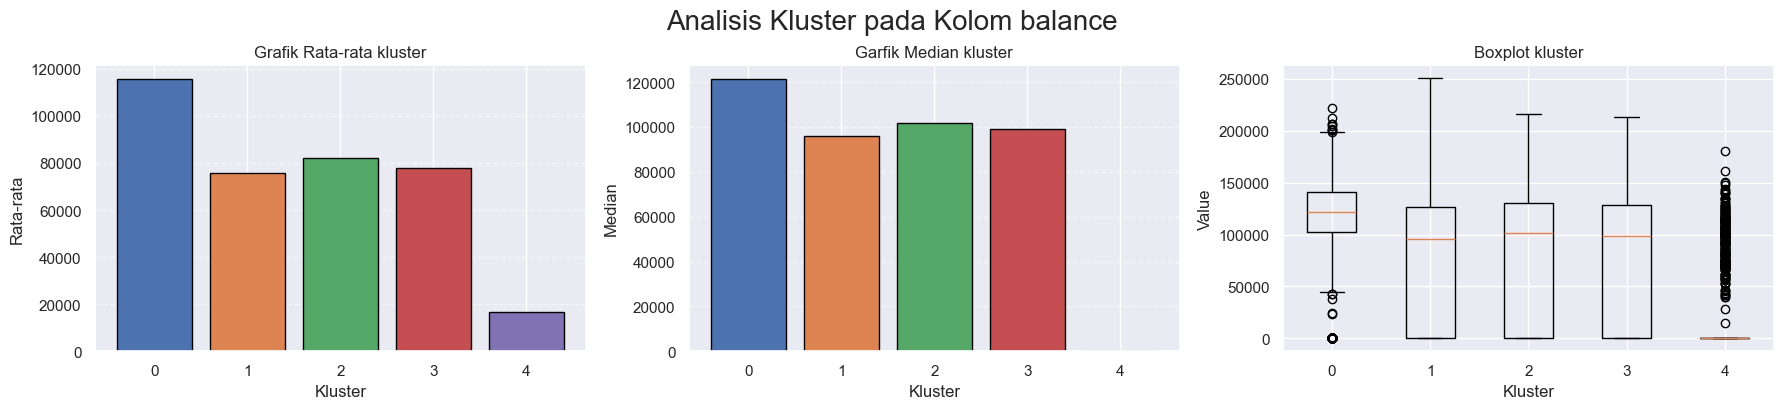

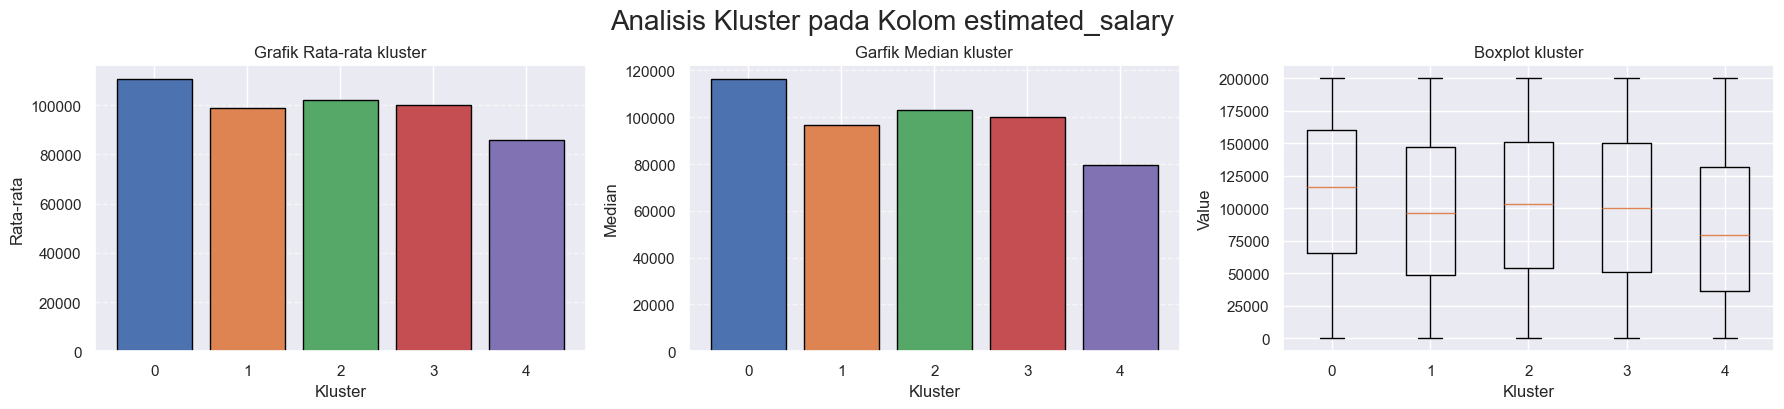

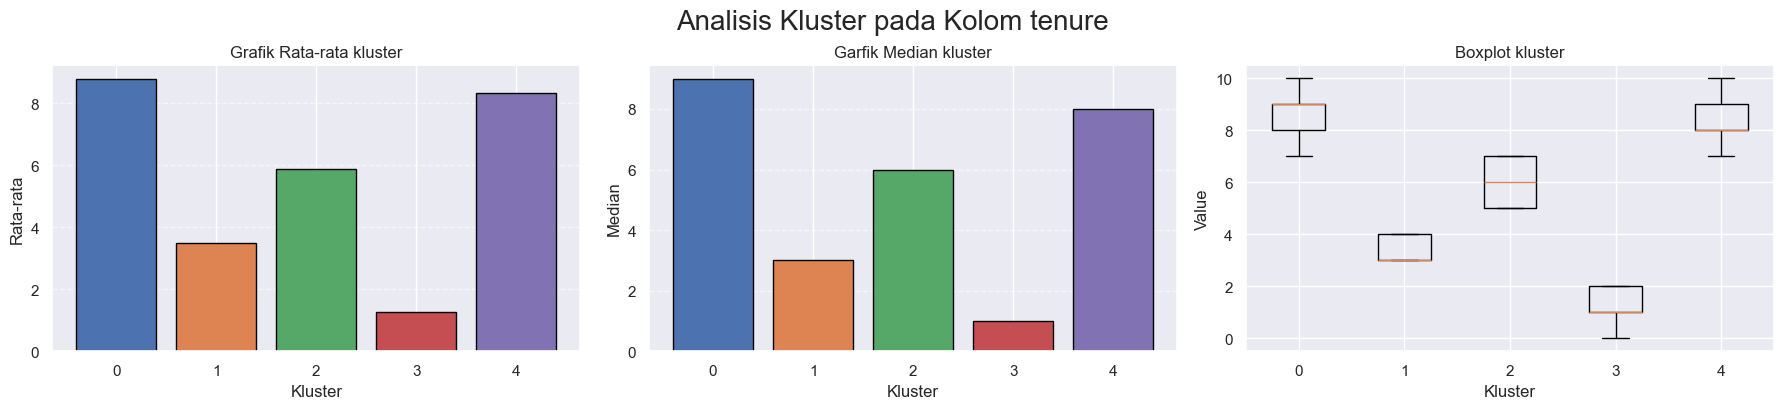

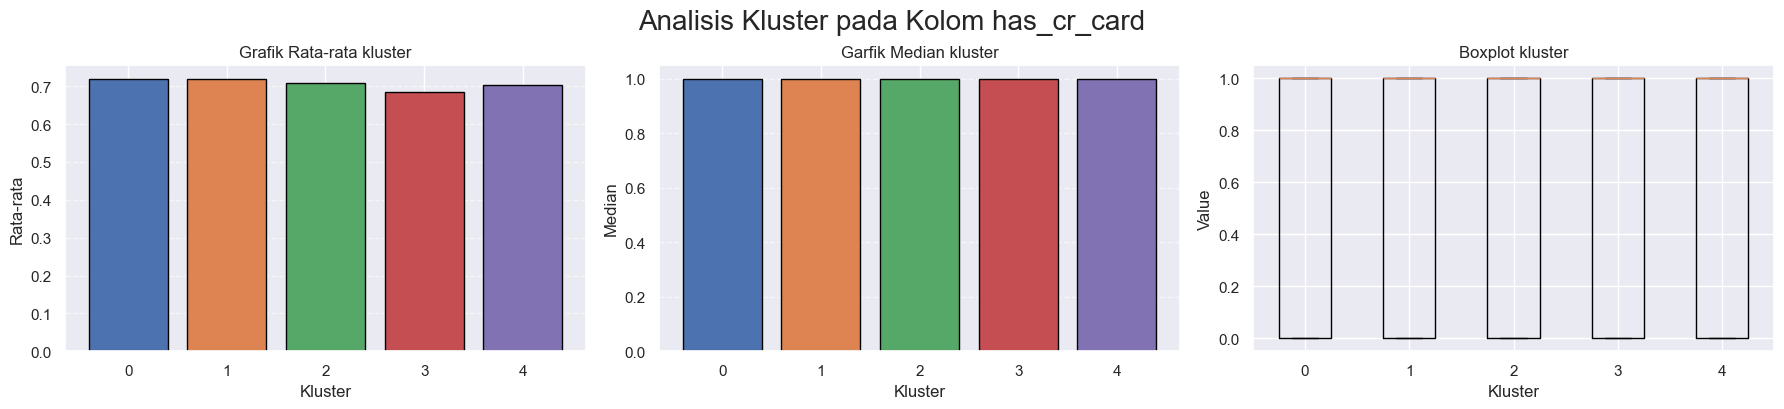

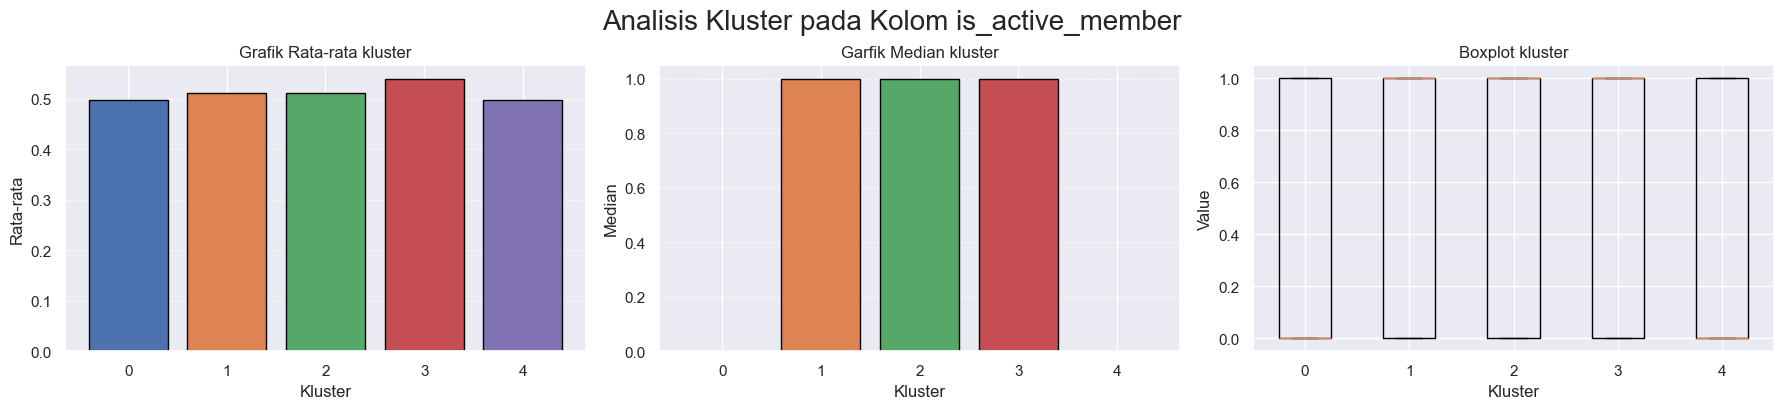

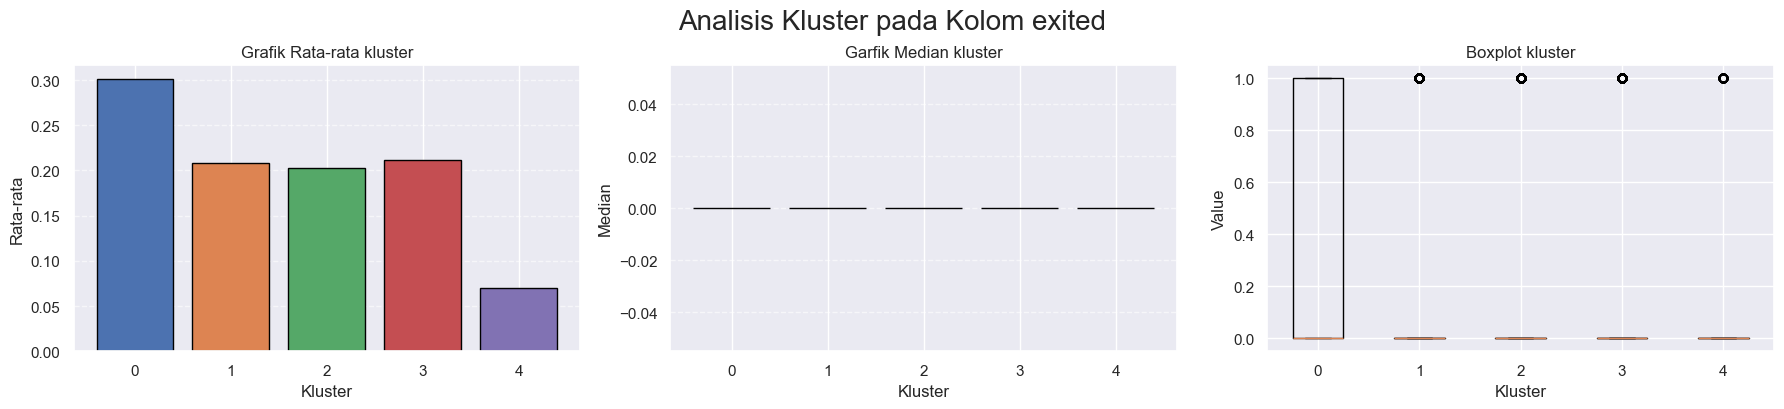

In [25]:
# Pembuatan plot analisa masing-masing kolom
plot_kluster(df_eval[['credit_score', 'age', 'balance', 'estimated_salary', 'kluster','tenure', 'has_cr_card', 'is_active_member', 'exited']], 'kluster')

In [26]:
# Melakukan filtering akan setiap kluster
kluster_0 = df_eval[df_eval['kluster'] == 0]
kluster_1 = df_eval[df_eval['kluster'] == 1]
kluster_2 = df_eval[df_eval['kluster'] == 2]
kluster_3 = df_eval[df_eval['kluster'] == 3]
kluster_4 = df_eval[df_eval['kluster'] == 4]

### **A. Kluster 0**

Berdasarkan hasil analisis kluster pada setiap kolom dapat diberikan kesimpulan bahwa kluster 0 memiliki krakteristik sebagai berikut.

- Memiliki jumlah sebesar 15%
- Memiliki umur yang cenderung lebih tua
- Memiliki gaji dan saldo yang cenderung lebih tinggi dibandingkan dengan kluster lain. 
- Cenderung sudah menggunakan produk dalam jangka waktu lama. 
- Cenderung lebih banyak secara proportional dalam jumlah pelanggan yang keluar dari bank

Dengan kata lain kluster 0 dapat dikatakan sebagai kluster **Pelanggan Senior**

### **B. Kluster 1**

Berdasarkan hasil analisis kluster pada setiap kolom dapat diberikan kesimpulan bahwa kluster 1 memiliki krakteristik sebagai berikut.

- Memiliki jumlah sebesar 20%
- Secara umum memiliki karakteristik rata-rata dari pelanggan bank
- Moderate secara saldo dan gaji
- Merupakan pelanggan dengan rata-rata lama penggunaan 2 sampai 4 tahun. 

Dengan kata lain kluster 1 dapat dikatakan sebagai kluster **Pelanggan Menengah**

### **C. Kluster 2**

Berdasarkan hasil analisis kluster pada setiap kolom dapat diberikan kesimpulan bahwa kluster 2 memiliki krakteristik sebagai berikut.

- Memiliki jumlah sebesar 26.8%
- Secara umum memiliki karakteristik rata-rata dari pelanggan bank
- Moderate secara saldo dan gaji
- Merupakan pelanggan dengan rata-rata lama penggunaan 4 sampai 6 tahun. 

Dengan kata lain kluster 2 dapat dikatakan sebagai kluster **Pelanggan Lama**

### **D. Kluster 3**

Berdasarkan hasil analisis kluster pada setiap kolom dapat diberikan kesimpulan bahwa kluster 3 memiliki krakteristik sebagai berikut.

- Memiliki jumlah sebesar 25%
- Secara umum memiliki karakteristik rata-rata dari pelanggan bank
- Moderate secara saldo dan gaji
- Merupakan pelanggan dengan rata-rata lama penggunaan 0 sampai 2 tahun. 

Dengan kata lain kluster 3 dapat dikatakan sebagai kluster **Pelanggan Baru**

### **E. Kluster 4**

Berdasarkan hasil analisis kluster pada setiap kolom dapat diberikan kesimpulan bahwa kluster 3 memiliki krakteristik sebagai berikut.

- Memiliki jumlah sebesar 13%
- Merupakan kluster dengan pelanggan paling muda
- Secara proportional cenderung lebih setia dibandingkan dengan kluster lain
- Memiliiki saldo dan perkiraan gaji paling kecil dibandingkan dengan kluster lain
- Cednerung sudah menggunakan produk dalam jangka waktu lama

Dengan kata lain kluster 4 dapat dikatakan sebagai kluster **Pelanggan Junior**

## **X. Model Saving**

Pada tahap ini dilakukan penyimpanan model, scaler serta encoder ke dalam bentuk `pickle`.

In [27]:
# Penyimpanan model linear regression
with open('model.pkl', 'wb') as file:
	pickle.dump(final_model, file)

# Penyimpanan preprocessing
with open('pipeline.pkl', 'wb') as file:
	pickle.dump(final_pipeline, file)

## **XI. Kesimpulan**

Kesimpulan yang dapat diambil dari dokumen ini adalah.

- Model prediksi KMeans menghasilkan data klustering paling optimal dengan menggunakan 5 kluster
- Kluster pertama adalah kluster pelanggan senior yang memiliki umur yang lebih tinggi dan memiliki saldo yang lebih banyak. 
- Kluster kedua adalah kluster pelanggan menengah yang memiliki durasi penggunaan kartu di antara 2 sampai 4 tahun. 
- Kluster ketiga adalah kluster pelanggan lama yang memiliki durasi penggunaan kartu di antara 4 sampai 6 tahun. 
- Kluster keempat adalah kluster pelanggan baru yang memiliki durasi penggunaan kartu di antara 0 sampai 2 tahun. 
- Kluster kelima adalah kluster pelanggan junior yang memiliki umur lebih muda dibandingkan dengan kluster lain namun telah menggunakan kartu bank dengan jangka waktu yang panjang. 

Saran akan _Improvement_.

- Kluster 0 : Pelanggan Senior: Fokus pada kesejahteraan finansial dan keamanan di masa pensiun yang menawarkan konsultasi keuangan, asuransi kesehatan, dan fasilitas eksklusif.
- Kluster 1: Pelanggan Menengah: Dorong peningkatan kualitas hidup dengan program yang menawarkan berbagai produk dan layanan tambahan seperti poin reward, kredit tanpa agunan, dan asuransi proteksi.
- Kluster 2: Pelanggan Lama: Apresiasi loyalitas dengan program yang memberikan hadiah, akses prioritas, dan undangan eksklusif.
- Kluster 4: Pelanggan Baru: Bantu pelanggan baru merasa nyaman dengan program yang menawarkan bonus selamat datang, tutorial penggunaan, dan program pengenalan produk.
- Kluster 5: Pelanggan Junior: Tarik minat generasi muda dengan program yang memiliki desain dan konsep yang menarik sehingga dapat meningkatkan jumlah transaksi. 